In [1]:
import numpy as np
import pandas as pd
import os
import glob
from analysis_helper import *
from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

iter_max=10
task_col='pcba-aid624173'
cluster_col='BT_0.4 ID'

run_threshold=0
hs_params, benchmark_params, custom_params = 12, 6, 3
hs_job_count = hs_params*1
benchmark_job_count = benchmark_params*1
custom_job_count = custom_params*1

hs_dir = glob.glob('../../../aldd_results/params_results_exp_2\\sampled_hyparams/*/*/*/')
custom_dir = glob.glob('../../../aldd_results/params_results_exp_2\\custom_cbws/*/*/*/')
benchmark_dir = glob.glob('../../../aldd_results/params_results_exp_2\\benchmarks/*/*/*/')

In [2]:
all_96_hs, all_384_hs, all_1536_hs, all_df_hs, successful_jobs, failed_jobs = get_results(hs_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('HS Jobs:')
print('Total jobs: {}'.format(hs_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:2]) for x in successful_jobs])
print('Total HS: {}'.format(hs_params))
print('Successful HS: {}'.format(len(hs_unique)))

119/120
----------------------------------------------------------------------------
HS Jobs:
Total jobs: 12
Failed jobs: 15
Successful jobs: 105
Total HS: 12
Successful HS: 12


In [3]:
all_96_bm, all_384_bm, all_1536_bm, all_df_bm, successful_jobs, failed_jobs = get_results(benchmark_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('Benchmark Jobs:')
print('Total jobs: {}'.format(benchmark_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:2]) for x in successful_jobs])
print('Total HS: {}'.format(benchmark_params))
print('Successful HS: {}'.format(len(hs_unique)))

50/51
----------------------------------------------------------------------------
Benchmark Jobs:
Total jobs: 6
Failed jobs: 2
Successful jobs: 49
Total HS: 6
Successful HS: 5


In [4]:
all_96_cs, all_384_cs, all_1536_cs, all_df_cs, successful_jobs, failed_jobs = get_results(custom_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('Custom Jobs:')
print('Total jobs: {}'.format(custom_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:3]) for x in successful_jobs])
print('Total HS: {}'.format(custom_params))
print('Successful HS: {}'.format(len(hs_unique)))

29/30
----------------------------------------------------------------------------
Custom Jobs:
Total jobs: 3
Failed jobs: 10
Successful jobs: 20
Total HS: 3
Successful HS: 3


In [16]:
des_cols = ['hs_id', 'max_iter', 'exploitation_hits', 'exploration_hits', 'total_hits',
            'total_unique_hits', 'total_batch_size', 'hs_group', 'rf_id']
cdf = pd.concat([all_96_hs, all_96_bm, all_96_cs])
sdf = cdf[cdf['iter_num']==9999][des_cols]
sdf = sdf.groupby('hs_id').mean().sort_values('total_hits', ascending=False)
sdf

,max_iter,exploitation_hits,exploration_hits,total_hits,total_unique_hits,total_batch_size
hs_id,,,,,,
ClusterBasedWCSelector_678,19.000000,0.000000,197.250000,197.250000,197.250000,1920.0
ClusterBasedWCSelector_368,19.000000,55.600000,128.000000,183.600000,157.900000,1920.0
MABSelector_2,19.000000,182.900000,0.000000,182.900000,127.200000,1920.0
ClusterBasedWCSelector_341,19.000000,19.300000,163.100000,182.400000,155.700000,1920.0
ClusterBasedWCSelector_custom_1,19.000000,91.555556,86.666667,178.222222,178.222222,1920.0
ClusterBasedWCSelector_581,19.000000,170.222222,5.666667,175.888889,175.888889,1920.0
MABSelector_exploitive,19.000000,173.400000,0.000000,173.400000,121.400000,1920.0
ClusterBasedWCSelector_55,18.400000,0.000000,162.100000,162.100000,162.100000,1862.4
ClusterBasedWCSelector_467,19.000000,27.300000,131.300000,158.600000,131.900000,1920.0


## Plot exploit-explore hit progress

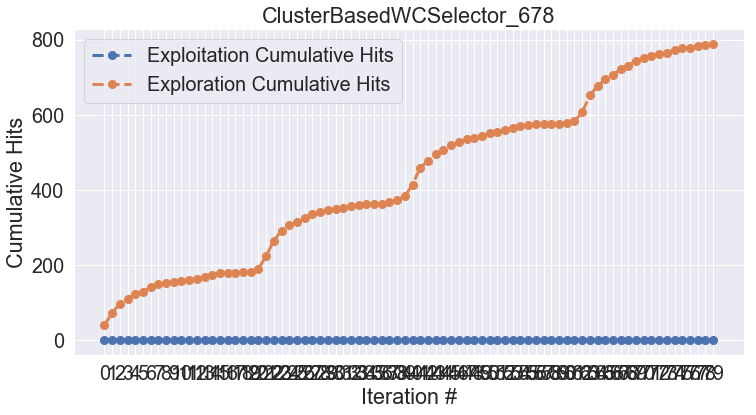

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(font_scale=1.8)
figsize=(12, 6)

sorted_hid_list = sdf.index.tolist()
iter_df = cdf[cdf['iter_num'] != 9999]
for hid in sorted_hid_list:
    temp_df = iter_df[iter_df['hs_id'] == hid]
    #temp_df = temp_df.groupby('iter_num').mean()
    exploit_s = temp_df['exploitation_hits'].cumsum()
    explore_s = temp_df['exploration_hits'].cumsum()
    
    plt.figure(figsize=figsize)
    plt.plot(np.arange(temp_df.shape[0]), exploit_s, linestyle='--', marker='o', markersize=8, linewidth=3)
    plt.plot(np.arange(temp_df.shape[0]), explore_s, linestyle='--', marker='o', markersize=8, linewidth=3)
    plt.xlabel('Iteration #')
    plt.ylabel('Cumulative Hits')
    plt.legend(['Exploitation Cumulative Hits', 'Exploration Cumulative Hits'])
    plt.title(hid)
    plt.xticks(np.arange(temp_df.shape[0]))
    plt.show()

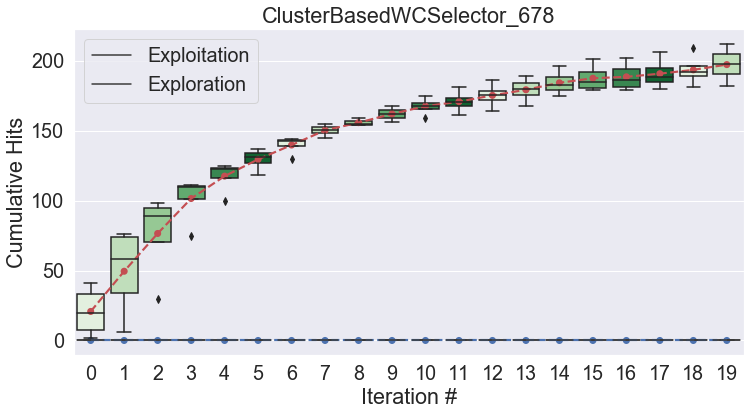

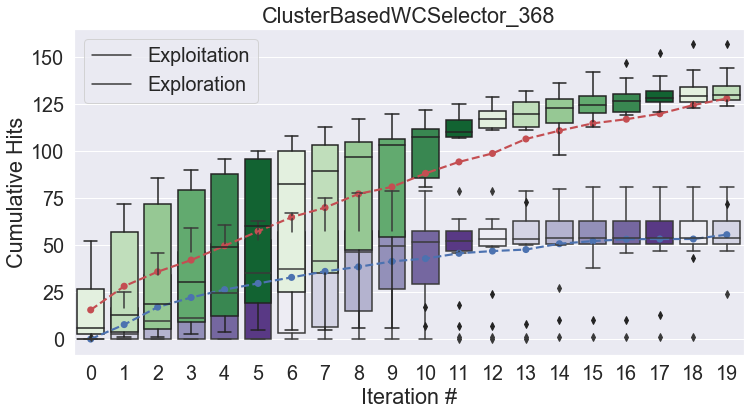

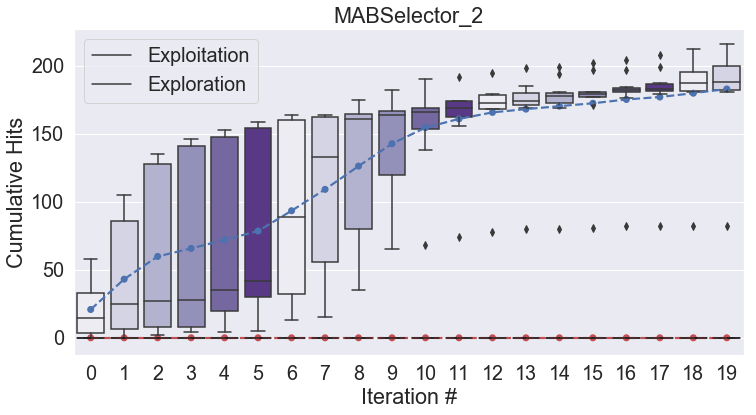

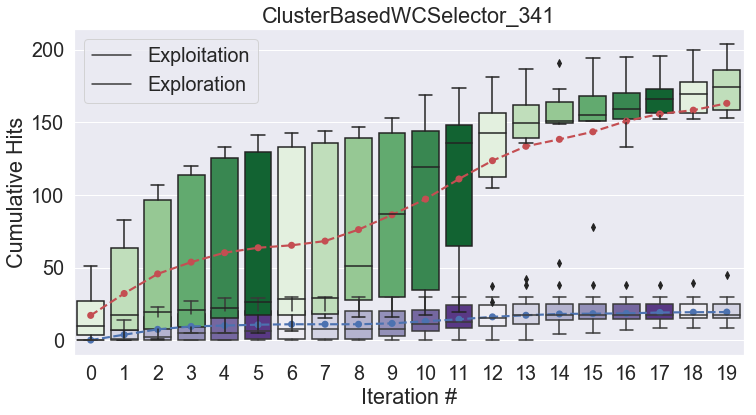

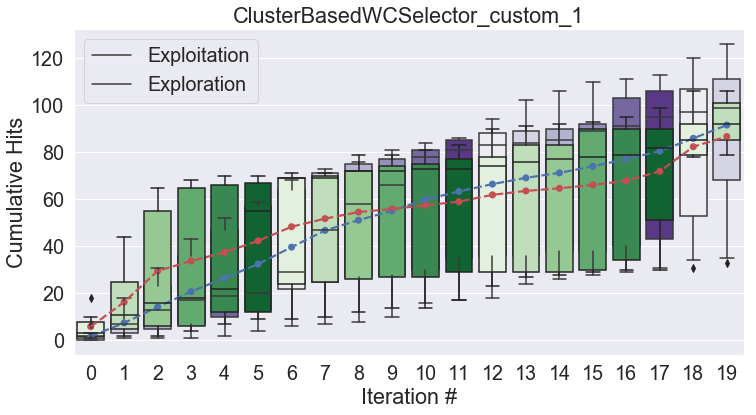

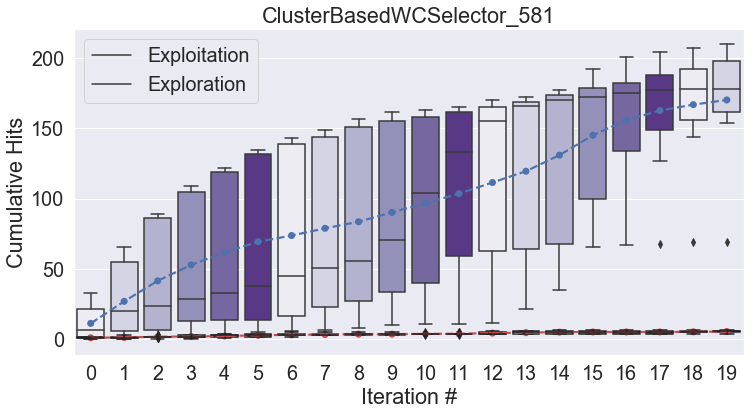

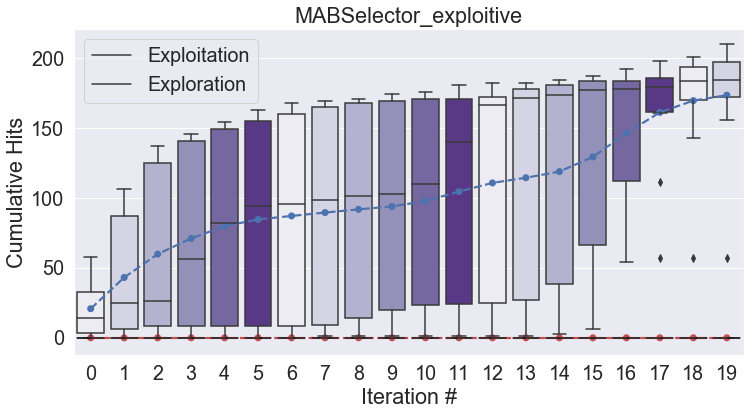

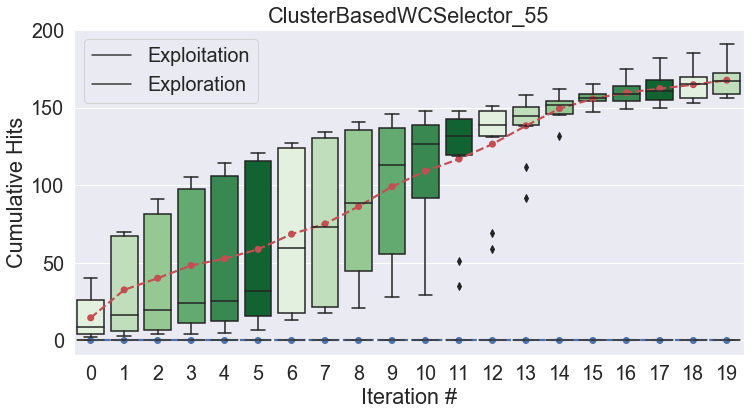

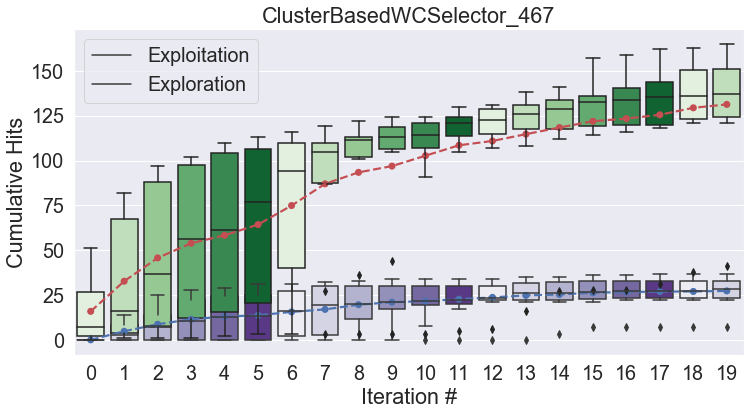

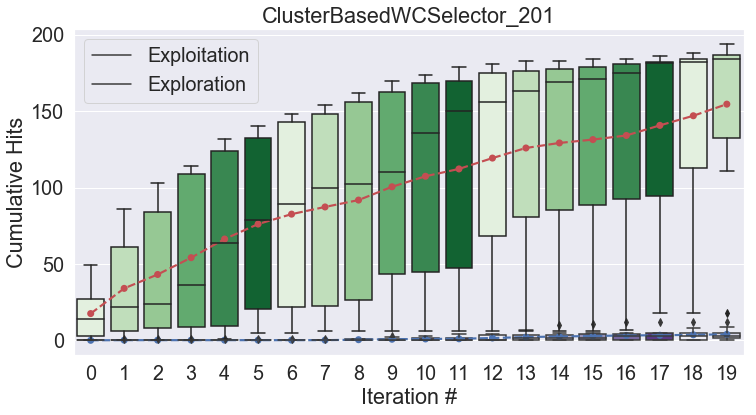

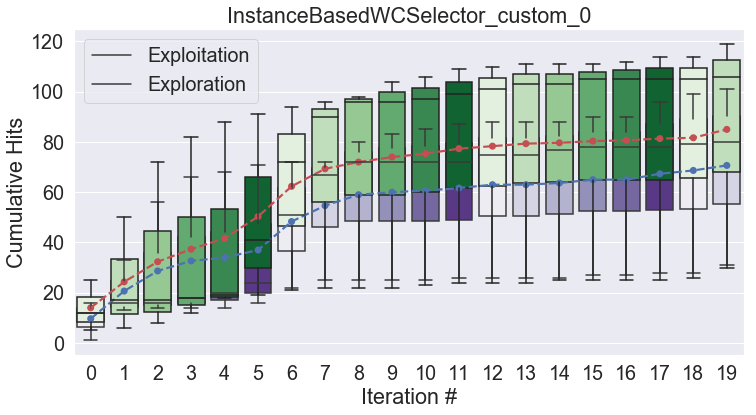

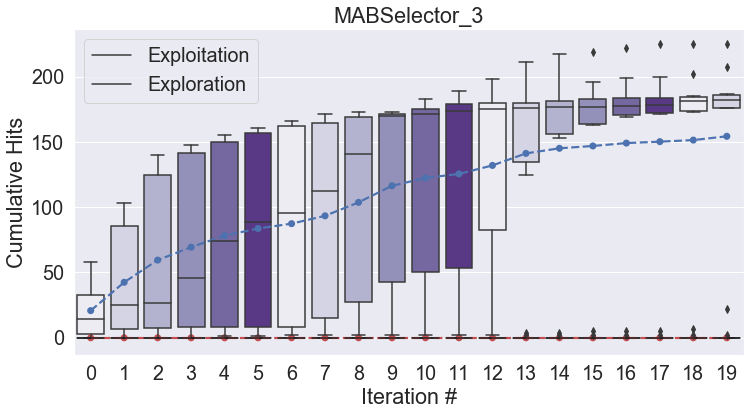

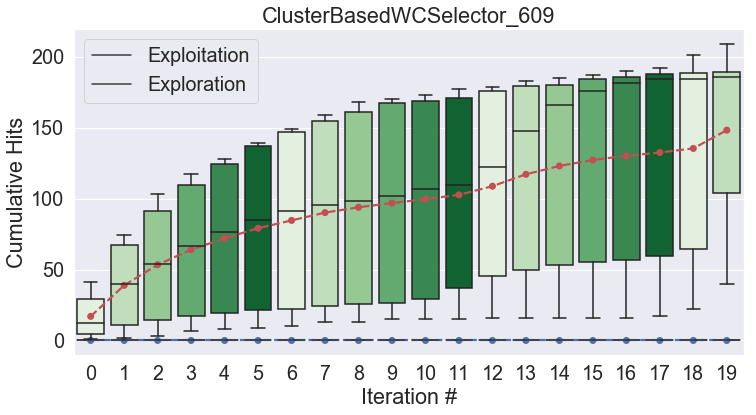

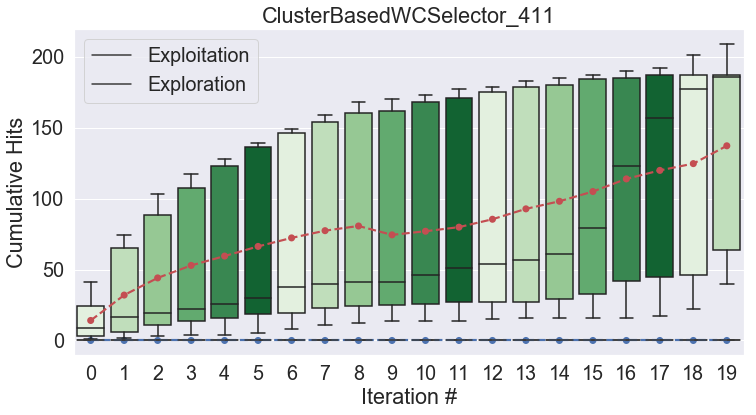

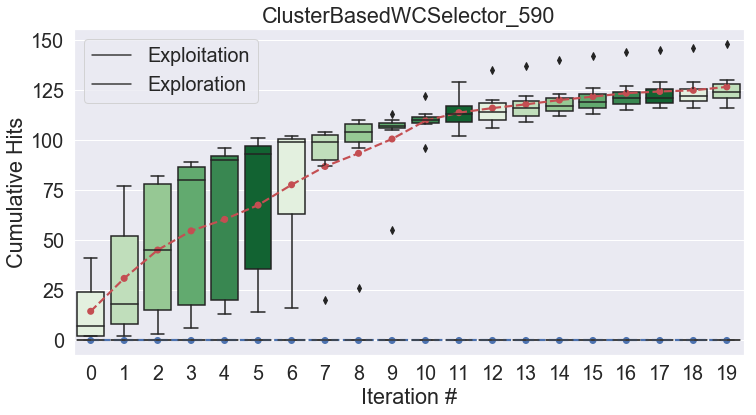

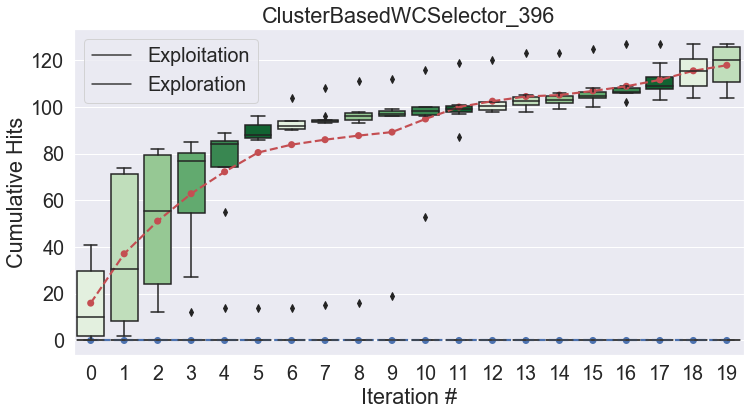

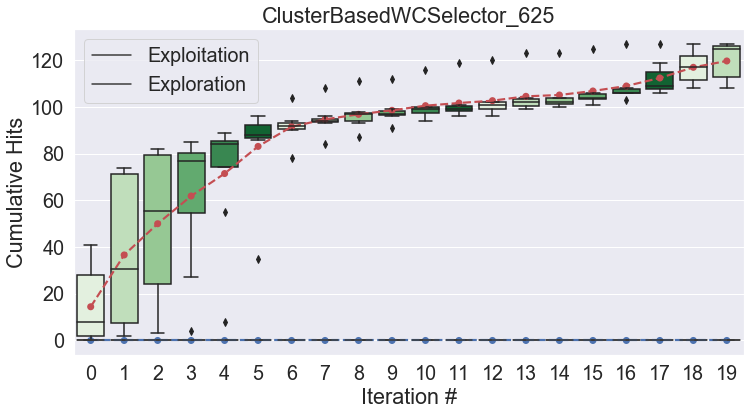

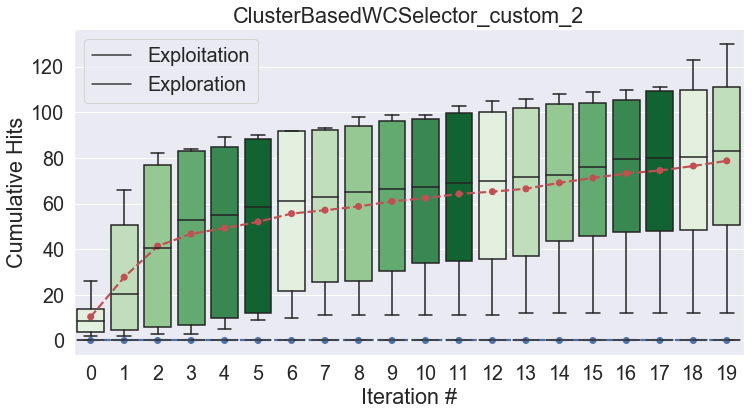

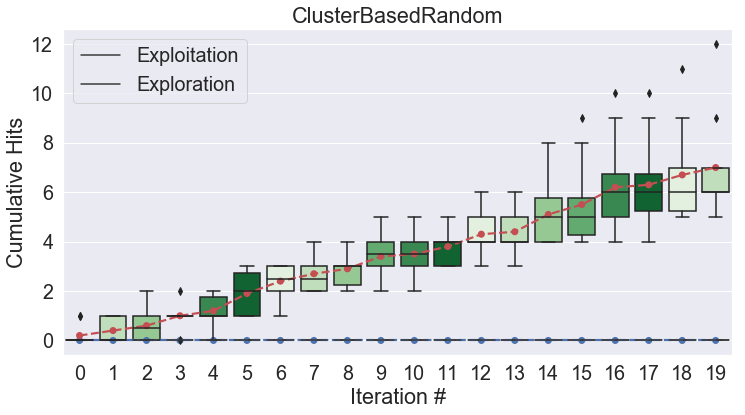

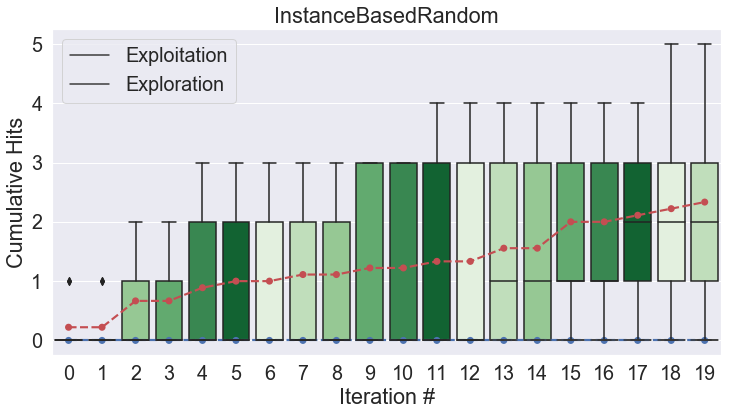

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(font_scale=1.8)
figsize=(12, 6)

sorted_hid_list = sdf.index.tolist()
iter_df = cdf[cdf['iter_num'] != 9999]
for hid in sorted_hid_list:
    temp_df = iter_df[iter_df['hs_id'] == hid]
    run_list = []
    for rid in temp_df['rf_id'].unique():
        run_df = temp_df[temp_df['rf_id'] == rid].sort_values('iter_num')
        run_df['exploit_cumsum'] = run_df['exploitation_hits'].cumsum()
        run_df['explore_cumsum'] = run_df['exploration_hits'].cumsum()

        run_list.append(run_df)

    run_df = pd.concat(run_list)

    plt.figure(figsize=figsize)
    
    sns.boxplot(data=run_df, x='iter_num', y='exploit_cumsum', palette=sns.color_palette("Purples"))
    sns.pointplot(data=run_df, x='iter_num', y='exploit_cumsum',  
                  linestyles='--', scale=0.8, color='b', errwidth=0, capsize=0)
    
    sns.boxplot(data=run_df, x='iter_num', y='explore_cumsum', palette=sns.color_palette("Greens"))
    sns.pointplot(data=run_df, x='iter_num', y='explore_cumsum',  
                  linestyles='--', scale=0.8, color='r', errwidth=0, capsize=0)
    
    plt.xlabel('Iteration #')
    plt.ylabel('Cumulative Hits')
    plt.legend(['Exploitation', 'Exploration'])
    plt.title(hid)
    plt.show()

In [145]:
iter_df[iter_df['hs_id']==sorted_hid_list[0]]

,iter_num,exploitation_hits,exploration_hits,total_hits,exploitation_unique_hits,exploration_unique_hits,total_unique_hits,exploitation_batch_size,exploration_batch_size,total_batch_size,max_iter,rf_id,hs_id,hs_group,config_file
0,0,16.0,5.0,21.0,5.0,2.0,7.0,48.0,48.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
1,1,0.0,1.0,1.0,0.0,1.0,1.0,29.0,67.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
2,2,0.0,2.0,2.0,0.0,2.0,2.0,48.0,48.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
3,3,2.0,4.0,6.0,2.0,3.0,5.0,29.0,67.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
4,4,2.0,7.0,9.0,2.0,7.0,9.0,28.0,68.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
5,5,4.0,22.0,26.0,3.0,19.0,22.0,30.0,66.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
6,6,27.0,31.0,58.0,19.0,22.0,41.0,37.0,59.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
7,7,16.0,18.0,34.0,13.0,18.0,31.0,28.0,68.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
8,8,13.0,8.0,21.0,12.0,8.0,20.0,28.0,68.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...
9,9,3.0,6.0,9.0,3.0,6.0,9.0,36.0,60.0,96.0,9,3605,InstanceBasedWCSelector_custom_0,custom_cbws,../../../aldd_results/params_results_exp_2\cus...


---
# Top models for batch_size=96

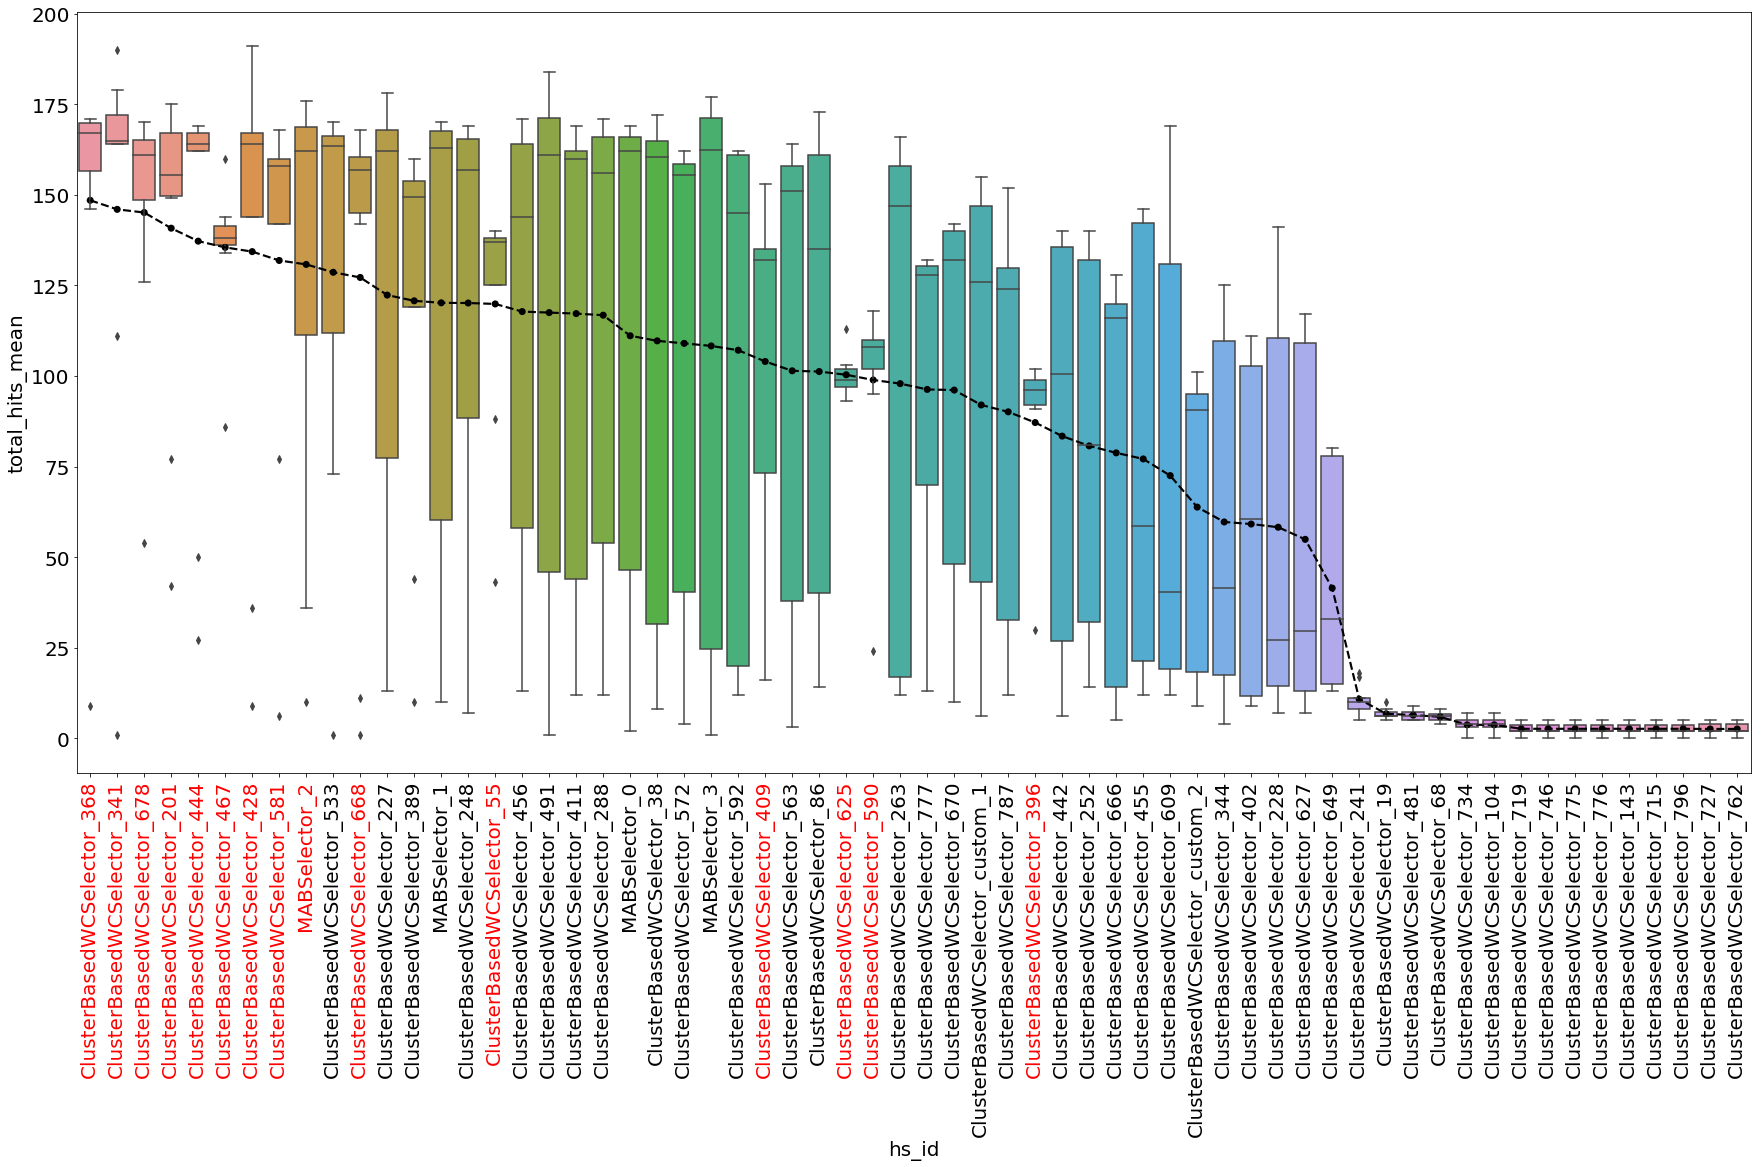

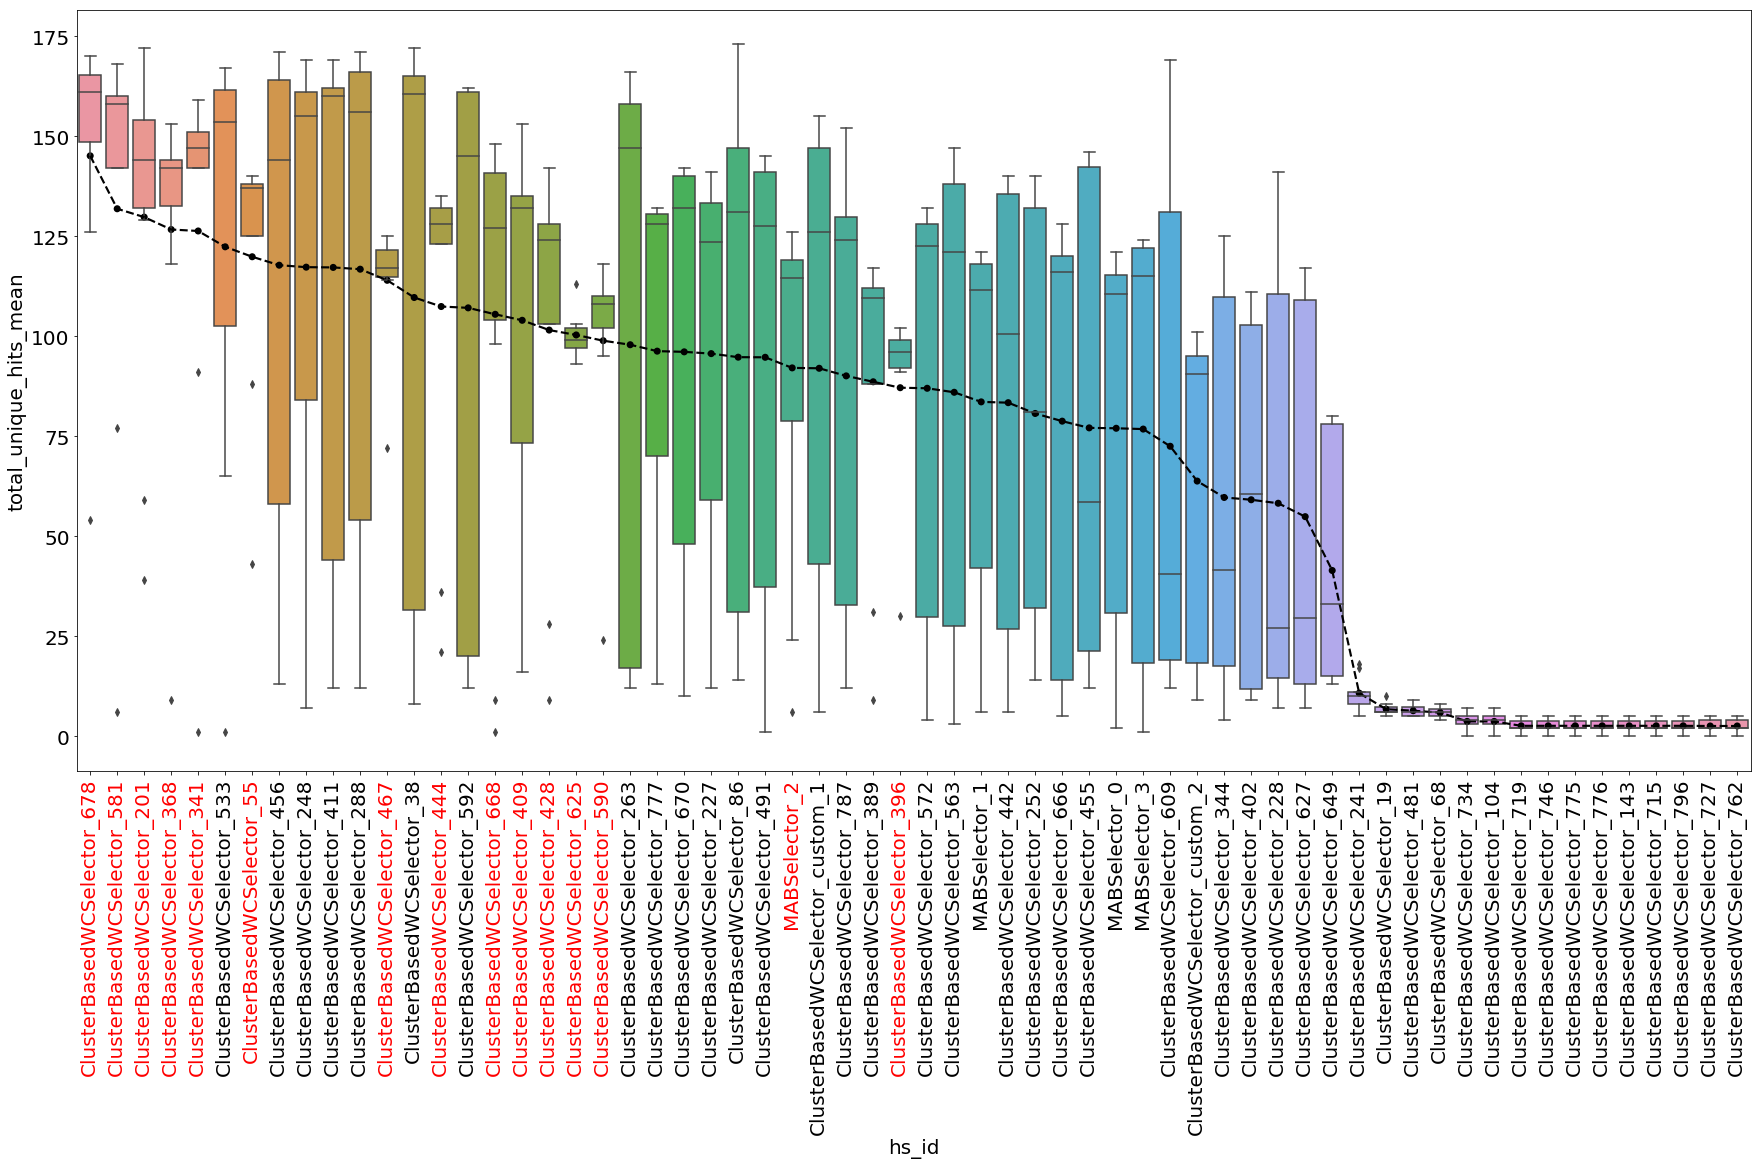

In [238]:
des_cols = ['exploitation_hits_mean', 'exploration_hits_mean', 'total_hits_mean', 'total_hits_std',
            'total_unique_hits_mean', 'run_counts', 'hs_group']
top_96_hs = get_top_summary(all_96_hs)
top_96_bm = get_top_summary(all_96_bm)
top_96_cs = get_top_summary(all_96_cs)

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from stat_analysis import *
%autoreload 2

all_96 = pd.concat([all_96_cs, all_96_bm, all_96_hs])
top_96_all = pd.concat([top_96_cs, top_96_bm, top_96_hs])
top_96_hits_dtk = plot_hs_boxplots(all_96, top_96_all, metric_col_box='total_hits', metric_col_point='total_hits_mean')
top_96_uhits_dtk = plot_hs_boxplots(all_96, top_96_all, metric_col_box='total_unique_hits', metric_col_point='total_unique_hits_mean')

---

### Why are the strategies exploration heavy?

Looking at config of these top performers, we can see the reason for why some don't do exploitation. See overleaf document for full explanation, but the following is the summary:

To guarantee that some exploitation takes place every iteration (although this may not be the best strategy), then set \textbf{exploitation_use_quantile_for_activity} and \textbf{exploitation_use_quantile_for_weight} to true. 

Conceivably, these top performers may perform exploitation in later iterations when the model matures and the activity predictions are pushed to the edges.

In [243]:
import json 

temp_df = all_96.loc[top_96_hits_dtk.index.tolist()[:15]].drop_duplicates('hs_id')

config_df = pd.concat([pd.read_csv(x) for x in temp_df['config_file']]).reset_index(drop=True)
config_df['class'] = temp_df['hs_id'].reset_index(drop=True)
config_df.index = config_df['class']
temp_df = pd.concat([top_96_all.loc[top_15_dtk][des_cols], config_df], axis=1)
temp_df = temp_df[['exploitation_hits_mean', 
       'exploitation_alpha', 
       'exploitation_activity_threshold', 
       'exploitation_weight_threshold',
       'exploitation_use_quantile_for_activity',
       'exploitation_use_quantile_for_weight',
       'hyperparameter_group', 'run_counts']].sort_values('exploitation_hits_mean')
temp_df

C:\Users\Moeman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
C:\Users\Moeman\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,exploitation_hits_mean,exploitation_alpha,exploitation_activity_threshold,exploitation_weight_threshold,exploitation_use_quantile_for_activity,exploitation_use_quantile_for_weight,hyperparameter_group,run_counts
ClusterBasedWCSelector_396,0.000000,0.25,0.25,0.50,True,False,middle_384,7
ClusterBasedWCSelector_409,0.000000,0.25,0.75,0.00,False,False,top_96,10
ClusterBasedWCSelector_428,0.000000,0.50,0.50,0.50,True,False,top_384,9
ClusterBasedWCSelector_55,0.000000,0.75,1.00,1.00,False,True,top_384,9
ClusterBasedWCSelector_590,0.000000,0.25,0.50,0.50,False,True,middle_96,10
ClusterBasedWCSelector_678,0.000000,0.50,0.25,0.50,True,False,top_96,8
ClusterBasedWCSelector_625,0.111111,0.50,0.25,0.00,False,False,middle_384,9
ClusterBasedWCSelector_201,0.400000,1.00,0.75,0.75,False,True,top_1536,10
ClusterBasedWCSelector_444,11.888889,1.00,0.75,0.75,False,False,top_1536,9
ClusterBasedWCSelector_341,17.444444,1.00,0.75,0.75,True,False,top_96,9


---
# Top models for batch_size=384

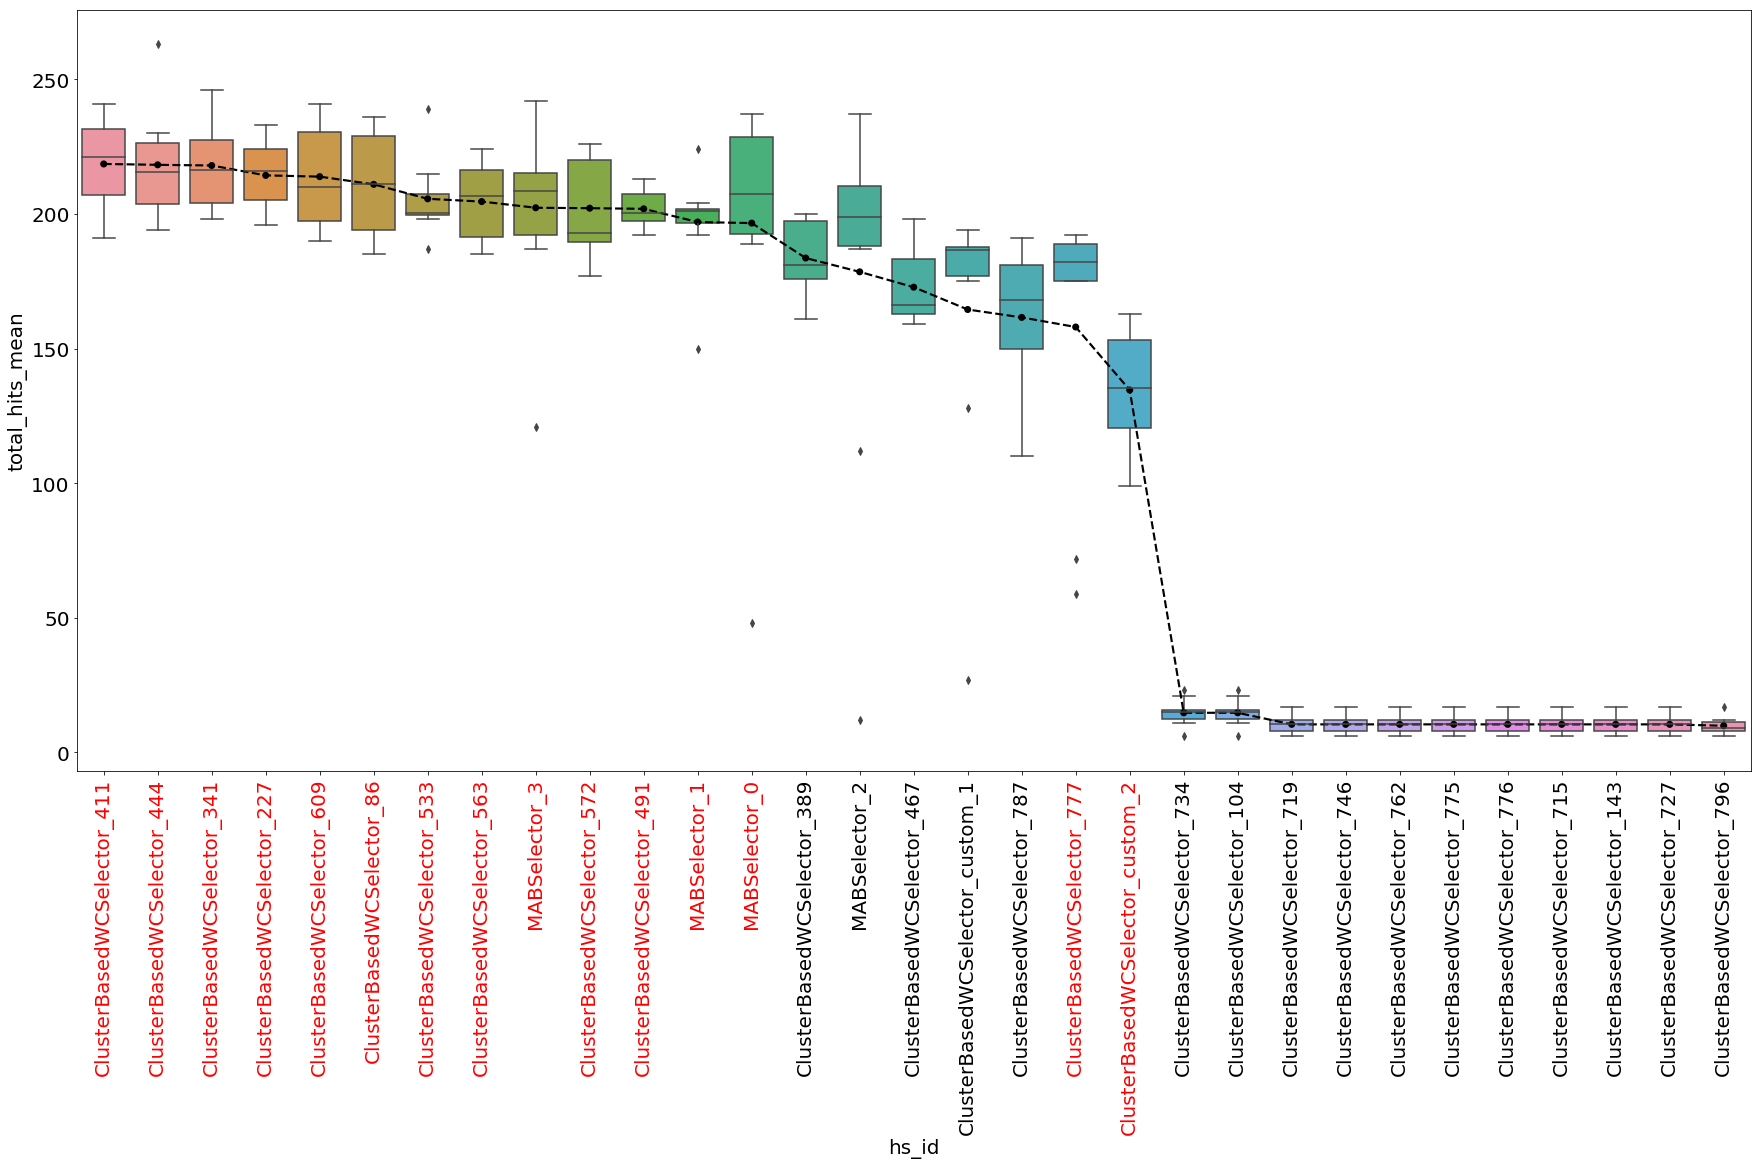

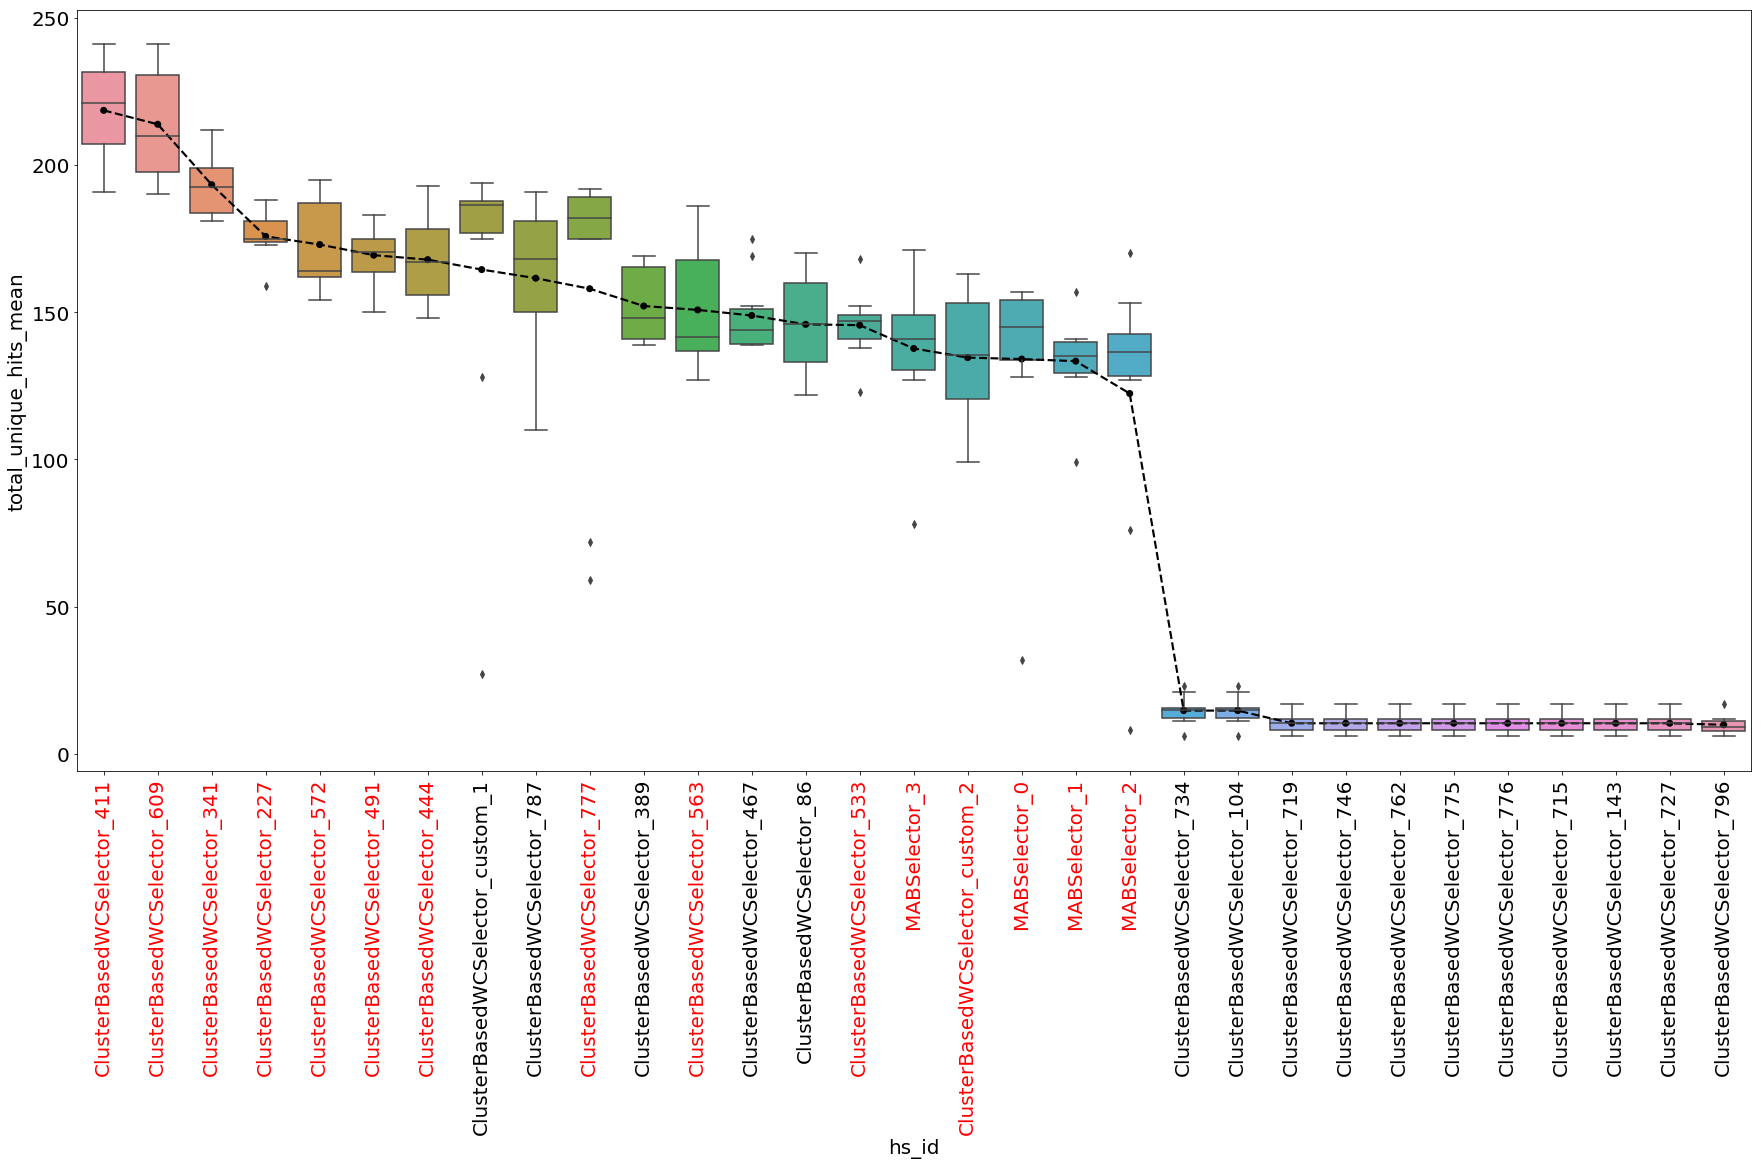

In [248]:
des_cols = ['exploitation_hits_mean', 'exploration_hits_mean', 'total_hits_mean', 'total_hits_std',
            'total_unique_hits_mean', 'run_counts', 'hs_group']
top_384_hs = get_top_summary(all_384_hs)
top_384_bm = get_top_summary(all_384_bm)
top_384_cs = get_top_summary(all_384_cs)

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from stat_analysis import *
%autoreload 2

all_384 = pd.concat([all_384_cs, all_384_bm, all_384_hs])
top_384_all = pd.concat([top_384_cs, top_384_bm, top_384_hs])
top_384_hits_dtk = plot_hs_boxplots(all_384, top_384_all, metric_col_box='total_hits', metric_col_point='total_hits_mean')
top_384_uhits_dtk = plot_hs_boxplots(all_384, top_384_all, metric_col_box='total_unique_hits', metric_col_point='total_unique_hits_mean')

---
# Top models for batch_size=1536

C:\Users\Moeman\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


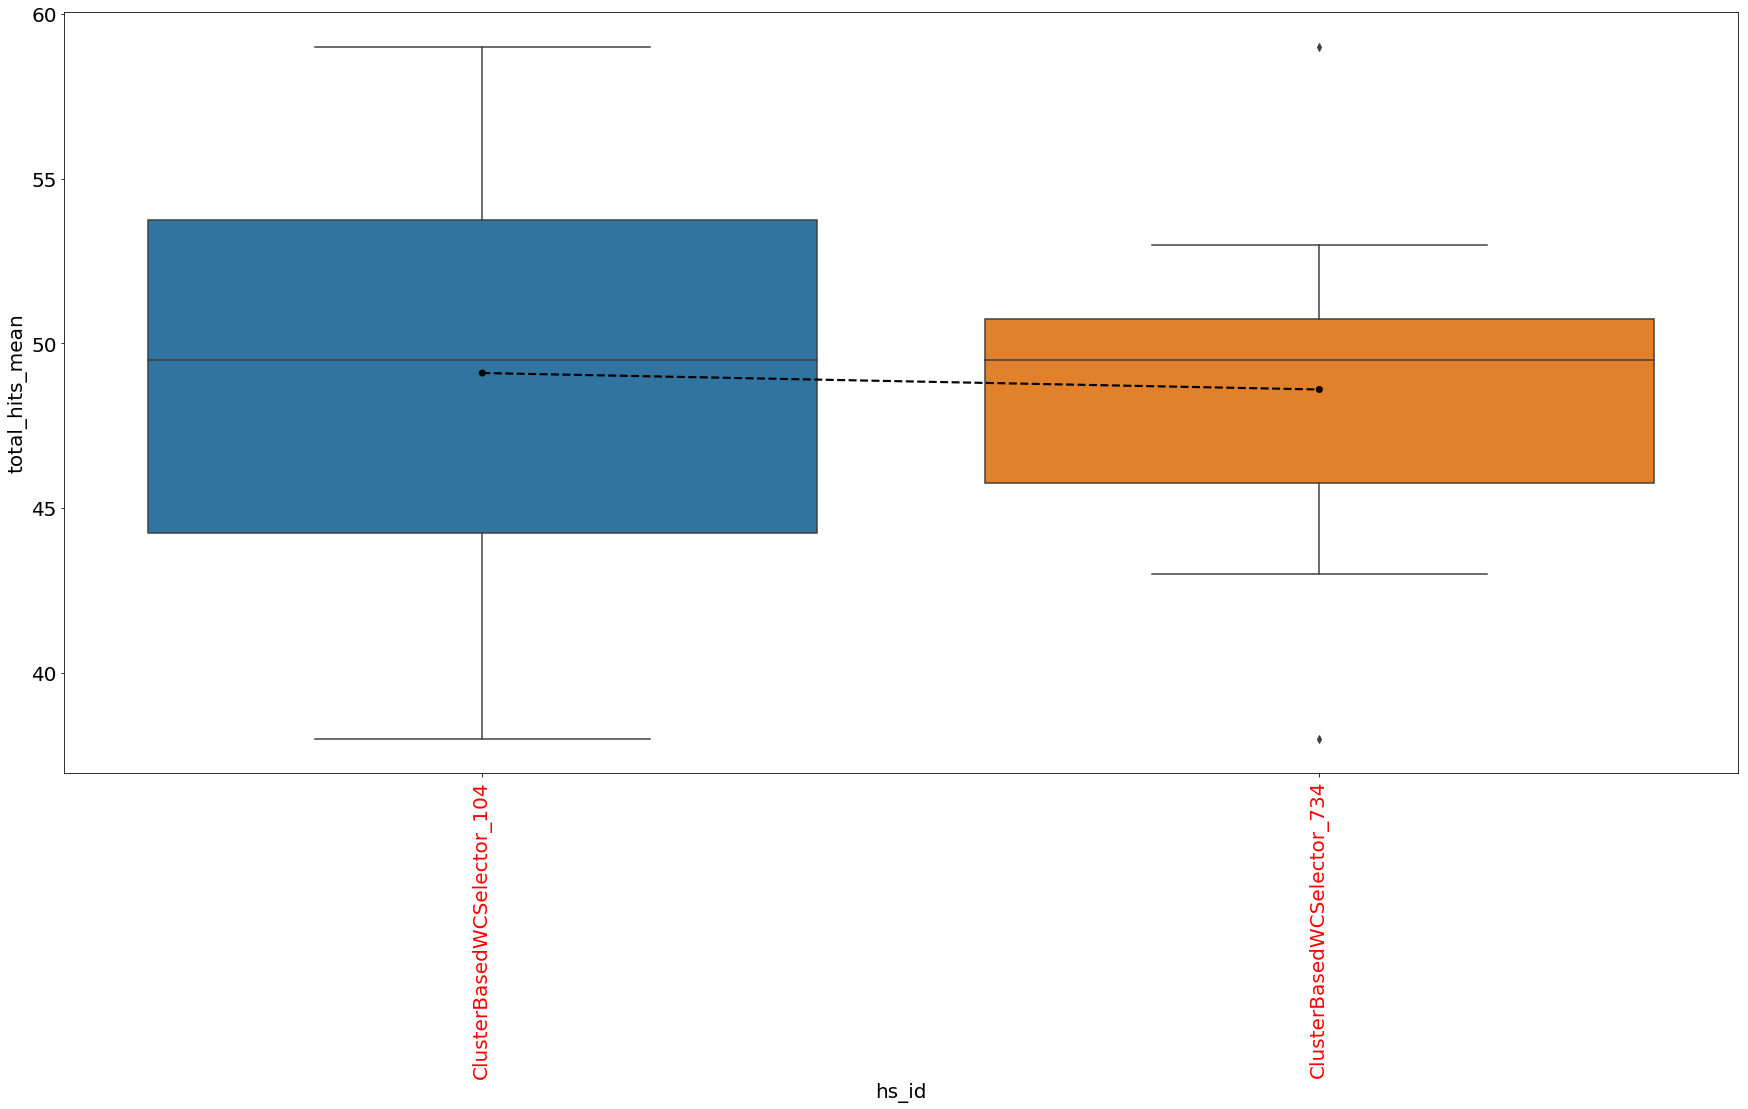

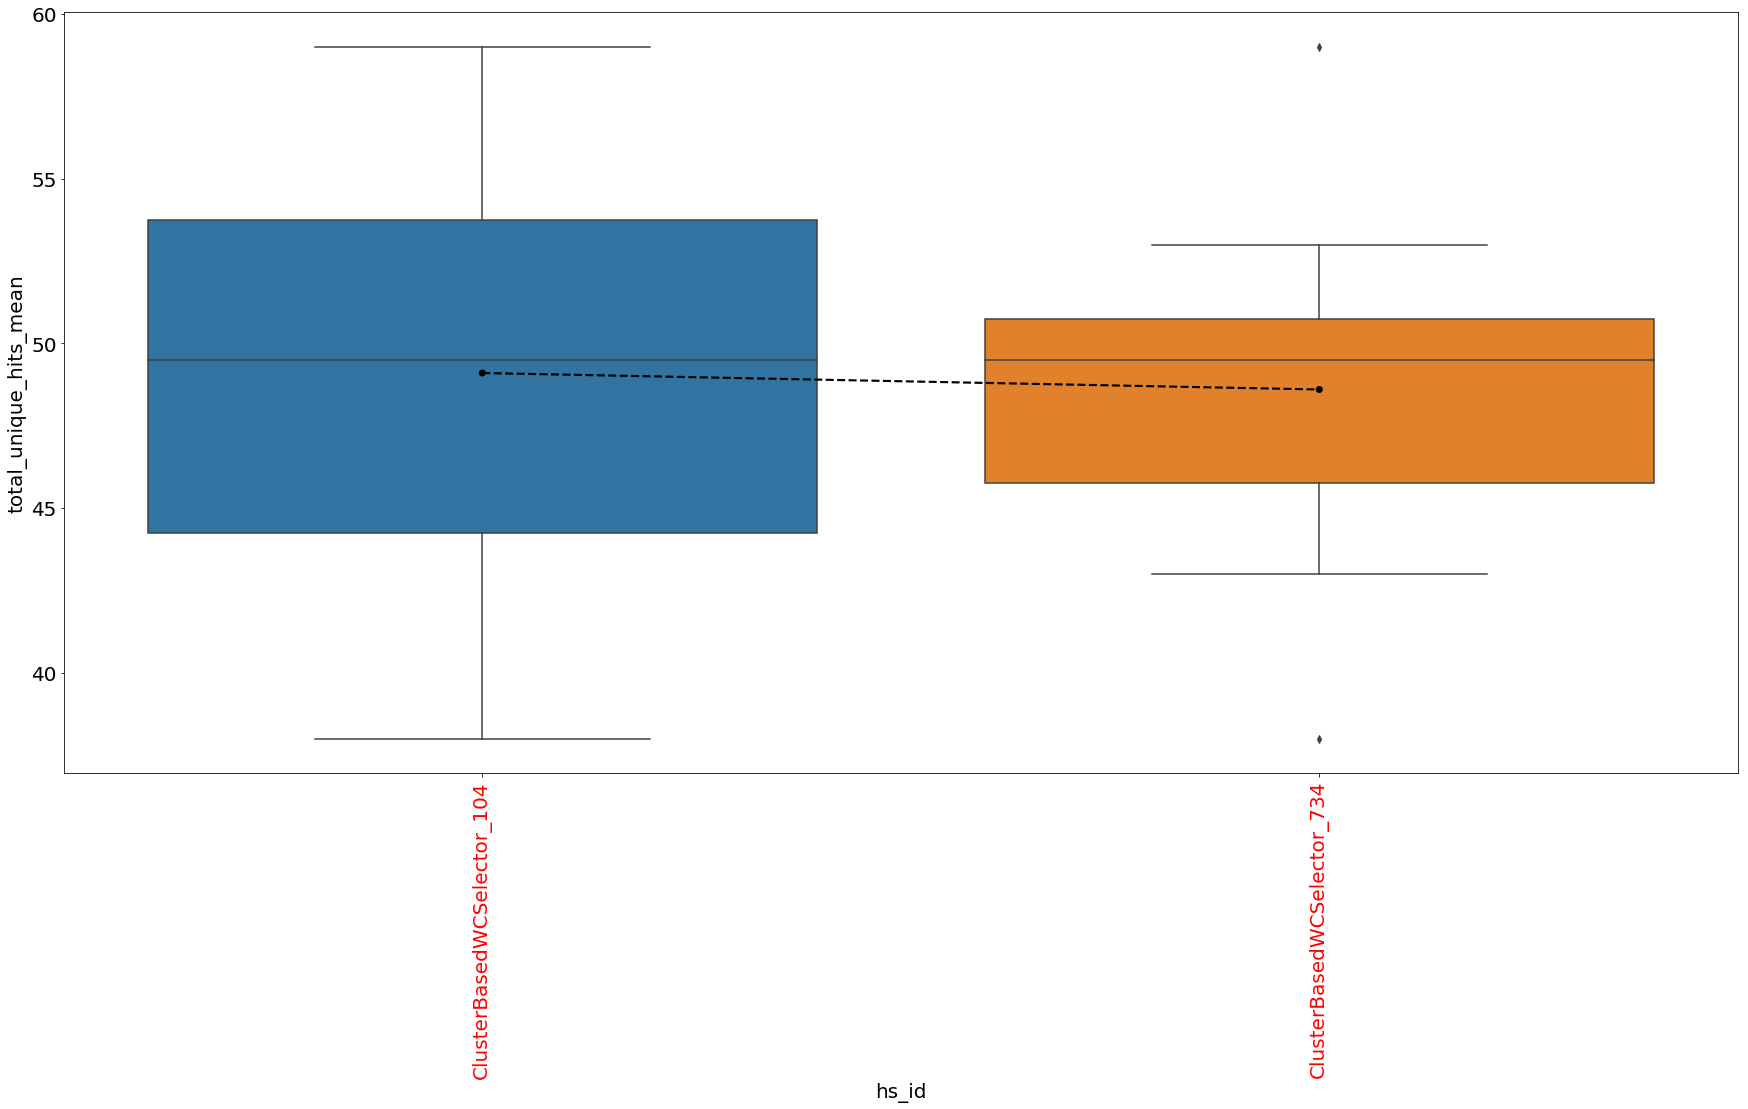

In [249]:
des_cols = ['exploitation_hits_mean', 'exploration_hits_mean', 'total_hits_mean', 'total_hits_std',
            'total_unique_hits_mean', 'run_counts', 'hs_group']
top_1536_hs = get_top_summary(all_1536_hs)
top_1536_bm = get_top_summary(all_1536_bm)
top_1536_cs = None
#top_1536_cs = get_top_summary(all_1536_cs)

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from stat_analysis import *
%autoreload 2

all_1536 = pd.concat([all_1536_cs, all_1536_bm, all_1536_hs])
top_1536_all = pd.concat([top_1536_cs, top_1536_bm, top_1536_hs])
top_1536_hits_dtk = plot_hs_boxplots(all_1536, top_1536_all, metric_col_box='total_hits', metric_col_point='total_hits_mean')
top_1536_uhits_dtk = plot_hs_boxplots(all_1536, top_1536_all, metric_col_box='total_unique_hits', metric_col_point='total_unique_hits_mean')

---
# Overlap of top performers across batch size

In [255]:
top_96_hits_dtk[:16]

ClusterBasedWCSelector_625    16.0
ClusterBasedWCSelector_467    16.0
ClusterBasedWCSelector_368    16.0
ClusterBasedWCSelector_678    16.0
ClusterBasedWCSelector_581    15.0
ClusterBasedWCSelector_55     15.0
ClusterBasedWCSelector_590    15.0
ClusterBasedWCSelector_201    15.0
ClusterBasedWCSelector_396    15.0
ClusterBasedWCSelector_341    15.0
ClusterBasedWCSelector_444    15.0
ClusterBasedWCSelector_428    14.0
MABSelector_2                 14.0
ClusterBasedWCSelector_668    13.0
ClusterBasedWCSelector_409    12.0
MABSelector_1                  8.0
dtype: float64

In [264]:
top_96_uhits_dtk[:16]

ClusterBasedWCSelector_625    16.0
ClusterBasedWCSelector_467    16.0
ClusterBasedWCSelector_678    16.0
ClusterBasedWCSelector_341    15.0
ClusterBasedWCSelector_590    15.0
ClusterBasedWCSelector_201    15.0
ClusterBasedWCSelector_396    15.0
ClusterBasedWCSelector_581    15.0
ClusterBasedWCSelector_55     15.0
ClusterBasedWCSelector_368    15.0
ClusterBasedWCSelector_428    14.0
ClusterBasedWCSelector_444    14.0
MABSelector_2                 13.0
ClusterBasedWCSelector_668    12.0
ClusterBasedWCSelector_409    12.0
dtype: float64

In [265]:
top_384_hits_dtk[:16]

ClusterBasedWCSelector_227         13.0
ClusterBasedWCSelector_491         13.0
ClusterBasedWCSelector_609         12.0
MABSelector_1                      12.0
MABSelector_3                      12.0
ClusterBasedWCSelector_444         12.0
ClusterBasedWCSelector_533         12.0
ClusterBasedWCSelector_341         12.0
ClusterBasedWCSelector_411         12.0
ClusterBasedWCSelector_563         12.0
ClusterBasedWCSelector_86          12.0
ClusterBasedWCSelector_572         12.0
ClusterBasedWCSelector_777         11.0
ClusterBasedWCSelector_custom_2    11.0
MABSelector_0                      11.0
MABSelector_2                      11.0
dtype: float64

In [266]:
top_384_uhits_dtk[:16]

ClusterBasedWCSelector_411         23.0
ClusterBasedWCSelector_609         21.0
ClusterBasedWCSelector_341         18.0
ClusterBasedWCSelector_227         12.0
ClusterBasedWCSelector_491         12.0
ClusterBasedWCSelector_777         11.0
ClusterBasedWCSelector_custom_2    11.0
MABSelector_0                      11.0
MABSelector_1                      11.0
MABSelector_2                      11.0
MABSelector_3                      11.0
ClusterBasedWCSelector_444         11.0
ClusterBasedWCSelector_533         11.0
ClusterBasedWCSelector_563         11.0
ClusterBasedWCSelector_572         11.0
ClusterBasedWCSelector_custom_1    11.0
dtype: float64

### Selection for experiment 2
Promoted strategies:
- 12 strategies from CBWS based on dtk wins cutoffs shown above.
- 5 Benchmarks: random instance-based selector, random cluster into random instance selector, 
  dissimilar instance selector, MABSelector_2, and MABSelector_3
- 2 custom CBWS strategies. 

Total of 12 + 5 + 2 = 19 strategies to be run on experiment 2:
- Uses PCBA target:
- Splits dataset into random 96 plate sizes with the actives randomly placed into plates. 
- Each strategy seeded with random initial plate #.
- Run strategy for 50 iterations and batch_size=96.


In [289]:
from functools import reduce
import shutil

exp_2_selection = reduce(np.union1d, (top_96_hits_dtk[:10].index.tolist(), 
                                      top_96_uhits_dtk[:10].index.tolist(), 
                                      top_384_uhits_dtk[:3].index.tolist()))
des_json = [x for x in glob.glob('../param_configs/first_pass_hyperparams_old/*/*/*.json') if any([(y in x) for y in exp_2_selection])]

for x in des_json:
    shutil.copy(x, '../param_configs/experiment_2_hyperparams/sampled_hyparams/')